In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')

In [2]:
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
df = pd.read_csv (r'C:\Users\alext\OneDrive - Singapore Management University\Desktop\SMU General Shit\Y4S2 (FYP)\Project_2_SgCarMart Price Prediction\CarPricePrediction\Sentiment & Topic Modelling\getgo_reviews.csv')
# adding an row_id field to the dataframe, which will be useful for joining later
df["row_id"] = df.index + 1
#print first 10 rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df


,Rating,Review Text,Review Date,row_id
0,5 stars,A great car sharing with many types of cars,2 months ago,1
1,5 stars,Very convenient and easy rental with Getgo car...,2 months ago,2
2,1 star,As a frequent GetGo customer,2 months ago,3
3,4 stars,I was thrilled to drive an EV Hyundai Kona nea...,2 months ago,4
4,5 stars,GetGo is convenient to book and easy to use th...,2 months ago,5
5,5 stars,Great Car-Sharing service! Able to book a car ...,2 months ago,6
6,5 stars,Very convenient on getting a vehicle. In my v...,2 months ago,7
7,5 stars,GetGo always there when I need it. Very conven...,2 months ago,8
8,5 stars,Firstly,2 months ago,9
9,5 stars,One of the best Car-Sharing company that I hav...,2 months ago,10


In [3]:
#maybe should combine all the reviews of diff rental companies?

In [4]:
df = df.dropna(subset = ['Review Text'])
df.head(10)

,Rating,Review Text,Review Date,row_id
0,5 stars,A great car sharing with many types of cars,2 months ago,1
1,5 stars,Very convenient and easy rental with Getgo car...,2 months ago,2
2,1 star,As a frequent GetGo customer,2 months ago,3
3,4 stars,I was thrilled to drive an EV Hyundai Kona nea...,2 months ago,4
4,5 stars,GetGo is convenient to book and easy to use th...,2 months ago,5
5,5 stars,Great Car-Sharing service! Able to book a car ...,2 months ago,6
6,5 stars,Very convenient on getting a vehicle. In my v...,2 months ago,7
7,5 stars,GetGo always there when I need it. Very conven...,2 months ago,8
8,5 stars,Firstly,2 months ago,9
9,5 stars,One of the best Car-Sharing company that I hav...,2 months ago,10


In [5]:
#create a new data frame with "id" and "comment" fields
df_subset = df[['row_id', 'Review Text']].copy()
#data clean-up
#remove all non-aphabet characters
df_subset['Review Text'] = df_subset['Review Text'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
df_subset['Review Text'] = df_subset['Review Text'].str.casefold()
df_subset.head(10)

<ipython-input-5-facee4aaa85e>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['Review Text'] = df_subset['Review Text'].str.replace("[^a-zA-Z#]", " ")


,row_id,Review Text
0,1,a great car sharing with many types of cars
1,2,very convenient and easy rental with getgo car...
2,3,as a frequent getgo customer
3,4,i was thrilled to drive an ev hyundai kona nea...
4,5,getgo is convenient to book and easy to use th...
5,6,great car sharing service able to book a car ...
6,7,very convenient on getting a vehicle in my v...
7,8,getgo always there when i need it very conven...
8,9,firstly
9,10,one of the best car sharing company that i hav...


In [6]:
# set up empty dataframe for staging output
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [7]:
# print('Processing sentiment analysis...')
# sid = SentimentIntensityAnalyzer()
# t_df = df1
# for index, row in df_subset.iterrows():
#     scores = sid.polarity_scores(row[1])
#     for key, value in scores.items():
#         temp = [key,value,row[0]]
#         df1['row_id']=row[0]
#         df1['sentiment_type']=key
#         df1['sentiment_score']=value
#         t_df=t_df.append(df1)
# #remove dummy row with row_id = 99999999999
# t_df_cleaned = t_df[t_df.row_id != '99999999999']
# #remove duplicates if any exist
# t_df_cleaned = t_df_cleaned.drop_duplicates()
# # only keep rows where sentiment_type = compound
# t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
# print(t_df_cleaned.head(10))

In [8]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()

# Assuming df_subset is your DataFrame containing text data
t_df = df1.copy()  # Assuming df1 is initialized elsewhere
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key, value, row[0]]
        new_row = pd.DataFrame({'row_id': [row[0]], 'sentiment_type': [key], 'sentiment_score': [value]})
        t_df = pd.concat([t_df, new_row])

# Remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']

# Remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()

# Only keep rows where sentiment_type = compound
t_df_cleaned = t_df_cleaned[t_df_cleaned.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Processing sentiment analysis...
  row_id sentiment_type  sentiment_score
0      1       compound           0.7845
0      2       compound           0.8570
0      3       compound           0.0000
0      4       compound           0.6705
0      5       compound           0.8399
0      6       compound           0.8625
0      7       compound           0.0000
0      8       compound           0.0000
0      9       compound           0.0000
0     10       compound           0.7906


In [9]:
#merge dataframes
df_output = pd.merge(df, t_df_cleaned, on='row_id', how='inner')
df_output.head(10)

,Rating,Review Text,Review Date,row_id,sentiment_type,sentiment_score
0,5 stars,A great car sharing with many types of cars,2 months ago,1,compound,0.7845
1,5 stars,Very convenient and easy rental with Getgo car...,2 months ago,2,compound,0.8570
2,1 star,As a frequent GetGo customer,2 months ago,3,compound,0.0000
3,4 stars,I was thrilled to drive an EV Hyundai Kona nea...,2 months ago,4,compound,0.6705
4,5 stars,GetGo is convenient to book and easy to use th...,2 months ago,5,compound,0.8399
5,5 stars,Great Car-Sharing service! Able to book a car ...,2 months ago,6,compound,0.8625
6,5 stars,Very convenient on getting a vehicle. In my v...,2 months ago,7,compound,0.0000
7,5 stars,GetGo always there when I need it. Very conven...,2 months ago,8,compound,0.0000
8,5 stars,Firstly,2 months ago,9,compound,0.0000
9,5 stars,One of the best Car-Sharing company that I hav...,2 months ago,10,compound,0.7906


In [10]:
df_output['Rating'] = df_output['Rating'].str.extract('(\d+)').astype(int)
df_output

,Rating,Review Text,Review Date,row_id,sentiment_type,sentiment_score
0,5,A great car sharing with many types of cars,2 months ago,1,compound,0.7845
1,5,Very convenient and easy rental with Getgo car...,2 months ago,2,compound,0.8570
2,1,As a frequent GetGo customer,2 months ago,3,compound,0.0000
3,4,I was thrilled to drive an EV Hyundai Kona nea...,2 months ago,4,compound,0.6705
4,5,GetGo is convenient to book and easy to use th...,2 months ago,5,compound,0.8399
5,5,Great Car-Sharing service! Able to book a car ...,2 months ago,6,compound,0.8625
6,5,Very convenient on getting a vehicle. In my v...,2 months ago,7,compound,0.0000
7,5,GetGo always there when I need it. Very conven...,2 months ago,8,compound,0.0000
8,5,Firstly,2 months ago,9,compound,0.0000
9,5,One of the best Car-Sharing company that I hav...,2 months ago,10,compound,0.7906


In [11]:
df_output[["sentiment_score"]].describe()

,sentiment_score
count,1640.000000
mean,0.445575
std,0.417555
min,-0.946700
25%,0.144775
50%,0.552000
75%,0.784500
max,0.983100


In [12]:
df_outputput = df_output[df_output['Rating'] <= 2.0]


df_outputputput = df_outputput.filter(['Review Text','Rating', 'sentiment_score'], axis=1)
pd.set_option('display.max_colwidth', 1000)
df_outputputput.sort_values(by=["sentiment_score"], axis=0, ascending=True).head(5)

,Review Text,Rating,sentiment_score
805,"Had a very very bad experience ,Book my car at 1030am,reach car park at 10am but car not there,chat with stupid customer service ask me to look car park below and top and the worst thing ask me to look at next block which is not even a car …",1,-0.9467
1536,Customer Service is really bad and slow. Car doesn't return on time and CS reply slow and said will provide voucher but end of day still gonna chase them for voucher for the time wasted. Horrible...,1,-0.9090
1009,worst rental car service ever have in Singapore. I encounter many problem whenever I book the car. 1. tyre punctured . 2. car halfway no power. 3. Car dirty,1,-0.8979
1220,Getgo can make terrible mistakes!! I had a clean traffic record. Getgo gave the wrong person's record to LTA for traffic offence. I was given an offence letter by LTA when my booking is not even during the timeslot of the offence. Customer …,1,-0.8910
498,This is a company with very harsh terms and condition. will never recommend anyone to use their carsharing when the initial car conditions are bad. The way they treat their customer is also very bad Be prepared to get carrot headchop when things go south! you have been warned!,1,-0.8604


In [13]:
df_outputput = df_output[df_output['Rating'] == 5.0]


df_outputputput = df_outputput.filter(['Review Text','Rating', 'sentiment_score'], axis=1)
pd.set_option('display.max_colwidth', 1000)
df_outputputput.sort_values(by=["sentiment_score"], axis=0, ascending=False).head(5)

,Review Text,Rating,sentiment_score
84,Having used GetGo car sharing really helps traveling with my family of 5 much easier. Easy to book and have great numbers of different cars to try. Love the 7 seater as can bring more along our outing! Love the reward for helping to refuel the car petrol too!,5,0.9831
183,Getgo has always been part of my daily life. It is super convenient. The help service is very efficient and super responsive. They have been always helping to clear my doubts and queries. Thank you for being the best car-sharing service in Singapore!,5,0.9802
1451,Really love how easy it is to book and get the car. The car is clean and well maintained. Hope GetGo keep up the good work in maintaining the car in a good and clean condition!,5,0.9714
118,I have had a great experience with Getgo. There is generally always a car nearby for me to use when I need it and it's ideal for errands around the neighbourhood. The pricing is better that taking a cab two ways and I love the flexibility it gives me. Would definitely recommend trying it out.,5,0.9690
154,The app is easy to use. The cars are located conveniently. The best part is the experience of driving different models of cars. The support staff are great at their work and always ready to lend a helping hand.,5,0.9674


In [14]:
# import seaborn as sns
# #create seaborn boxplots by group
# sns.boxplot(x='dateCreated', y='sentiment_score', notch = False,
#             data=df_output, showfliers=False).set(title='Sentiment Score by time period')
# #modify axis labels
# plt.xlabel('Year')
# plt.ylabel('Sentiment Score')
# plt.xticks(rotation=90)

In [15]:
# #create seaborn barplots by group
# sns.barplot(x='dateCreated', y='sentiment_score', ci=None,
#             data=df_output).set(title='Sentiment Score by time period')
# #modify axis labels
# plt.xlabel('Year')
# plt.ylabel('Sentiment Score')

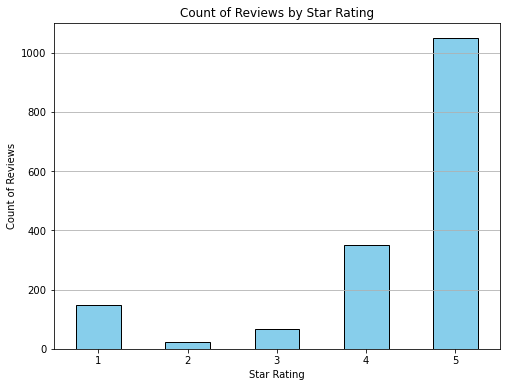

In [16]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_output containing star ratings
# Count the number of reviews for each star rating
star_ratings_count = df_output['Rating'].value_counts().sort_index()

# Plot the count of reviews as a bar chart
plt.figure(figsize=(8, 6))
star_ratings_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Reviews by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=0)  # Ensure x-axis labels are not rotated
plt.grid(axis='y')
plt.show()


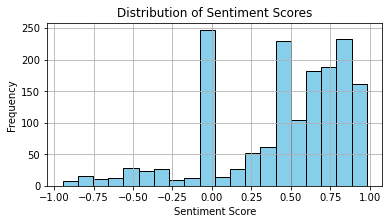

In [19]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_output containing sentiment scores
# Extract sentiment scores from the DataFrame
sentiment_scores = df_output['sentiment_score']

# Plot the distribution of sentiment scores
plt.figure(figsize=(6, 3))
plt.hist(sentiment_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


 Based on the criteria provided, if the sentiment score distribution aligns with the expected sentiment of the reviews, it indicates that the scoring accurately reflects the sentiment conveyed in the reviews.

 For instance, if the majority of reviews are positive, one would expect to see a higher concentration of positive sentiment scores. Similarly, if there are many negative reviews, lower sentiment scores would be expected. This alignment between the sentiment of the reviews and the sentiment scores suggests that the scoring system effectively captures the sentiment expressed in the text.

 Furthermore, through visual examination of the sentiment score distribution, one can observe whether the sentiment scores cluster around certain values or if there are distinct peaks corresponding to positive, negative, or neutral sentiment. If the distribution follows the expected pattern based on the sentiment of the reviews, it provides additional evidence that the scoring accurately reflects the sentiment conveyed in the text.

 Overall, when the sentiment score distribution follows the expected pattern based on the sentiment of the reviews, it indicates that the scoring system is consistent and reliable in assessing the sentiment of the text data.